1. Analyzed a set of requriements for a library information system
1. Expressed the result as a UML class diagram
1. improved the requirements
1. Some aspects of the problem that the UML diagram could not address
1. OCL

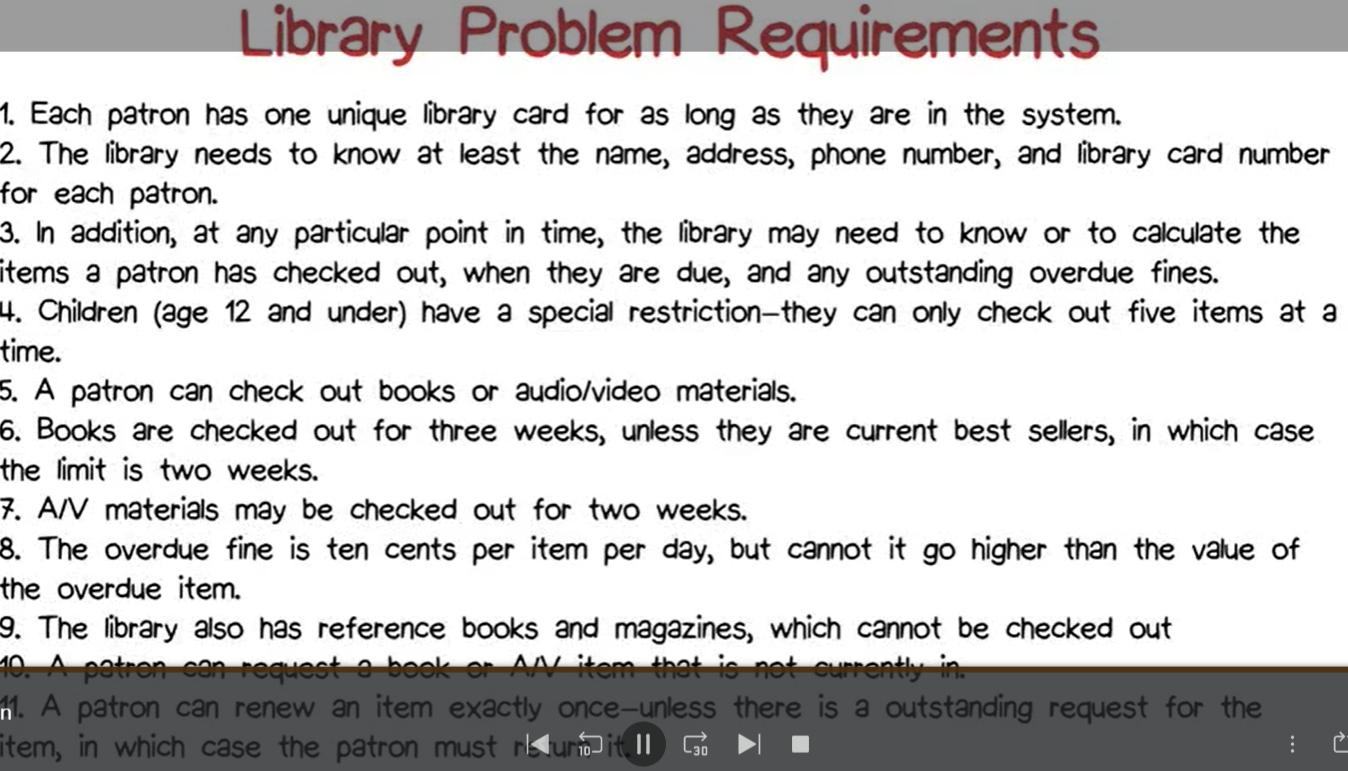

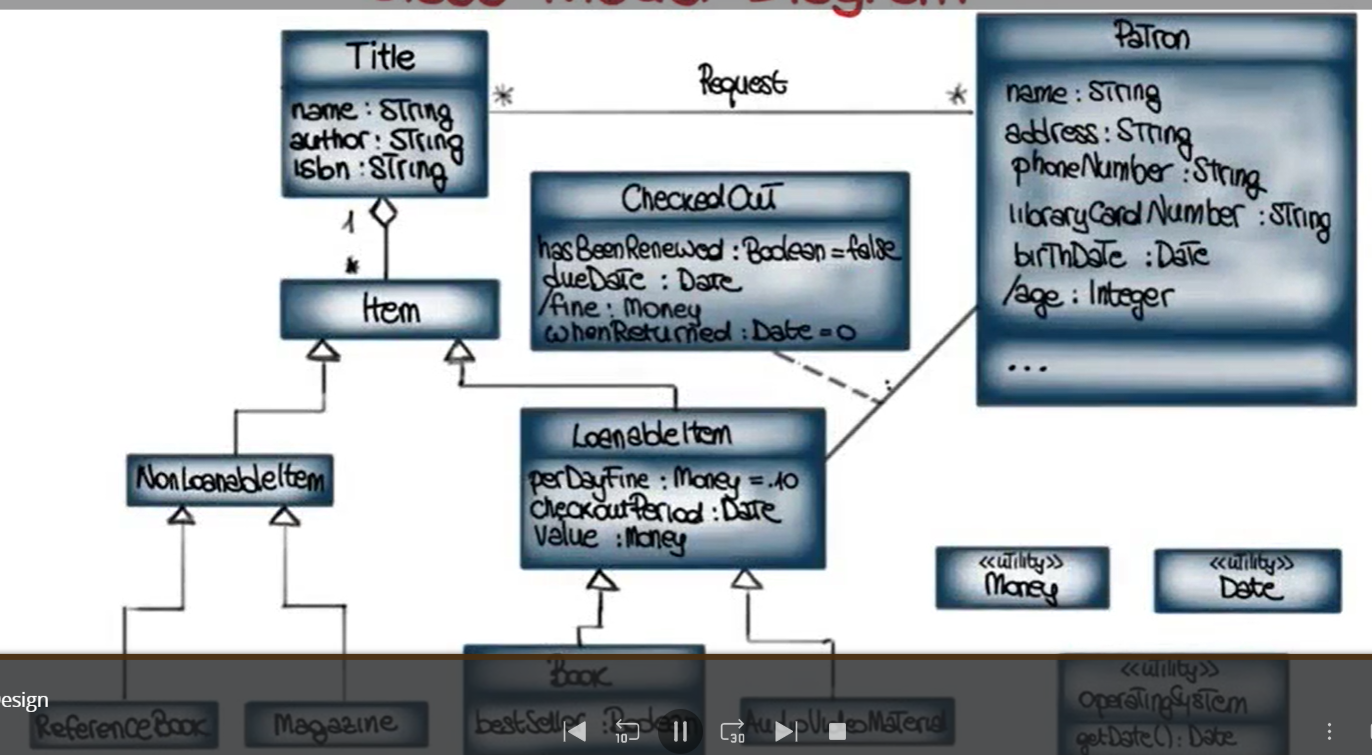

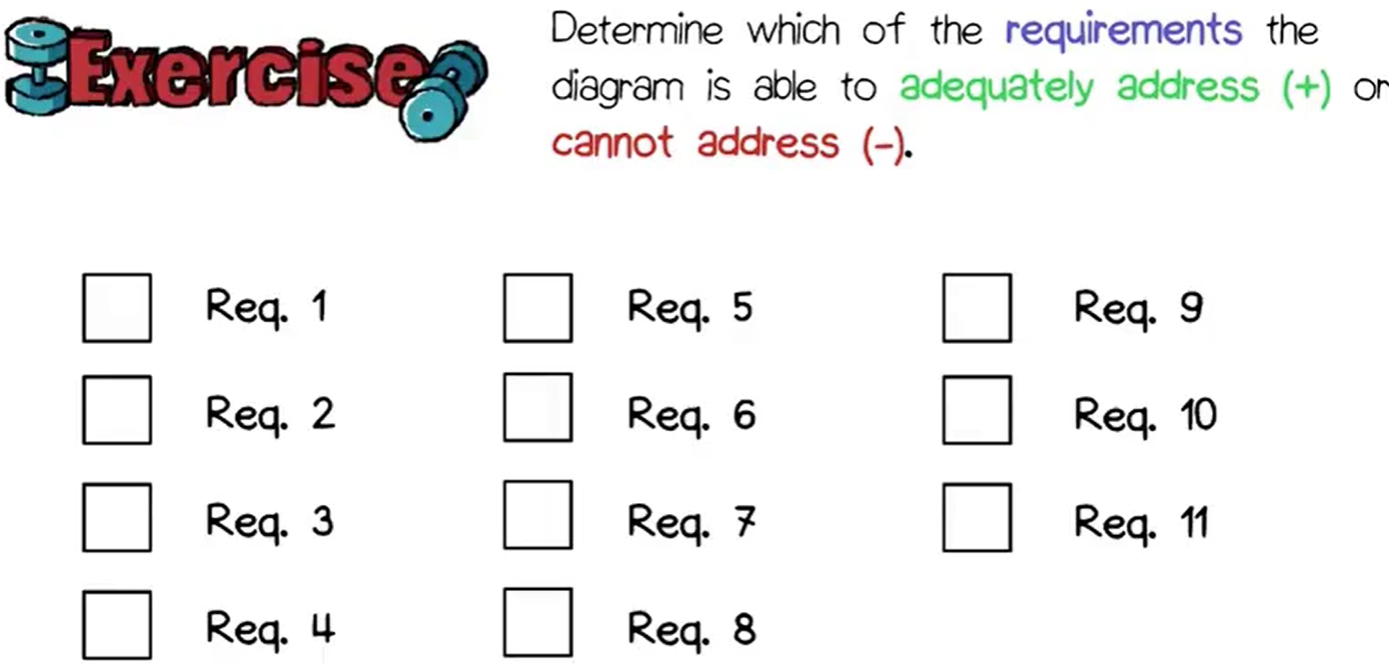
2

3(queries),5,9 partially
1. when there is an operation, uml can give only the signature but not the details of the operation

### Limitations
1. Either the specification as given by the diagram must be supplimented or an entirely new specificaiton must be introduced.

#### Requirement 6
1. there are explicit numbers of days
1. how to express check
1. UML provides a way to express requriements like this and association them with elements of diagrams
1. Object Constraint Language (OCL) is an official part of UML and provides sufficient expressive power

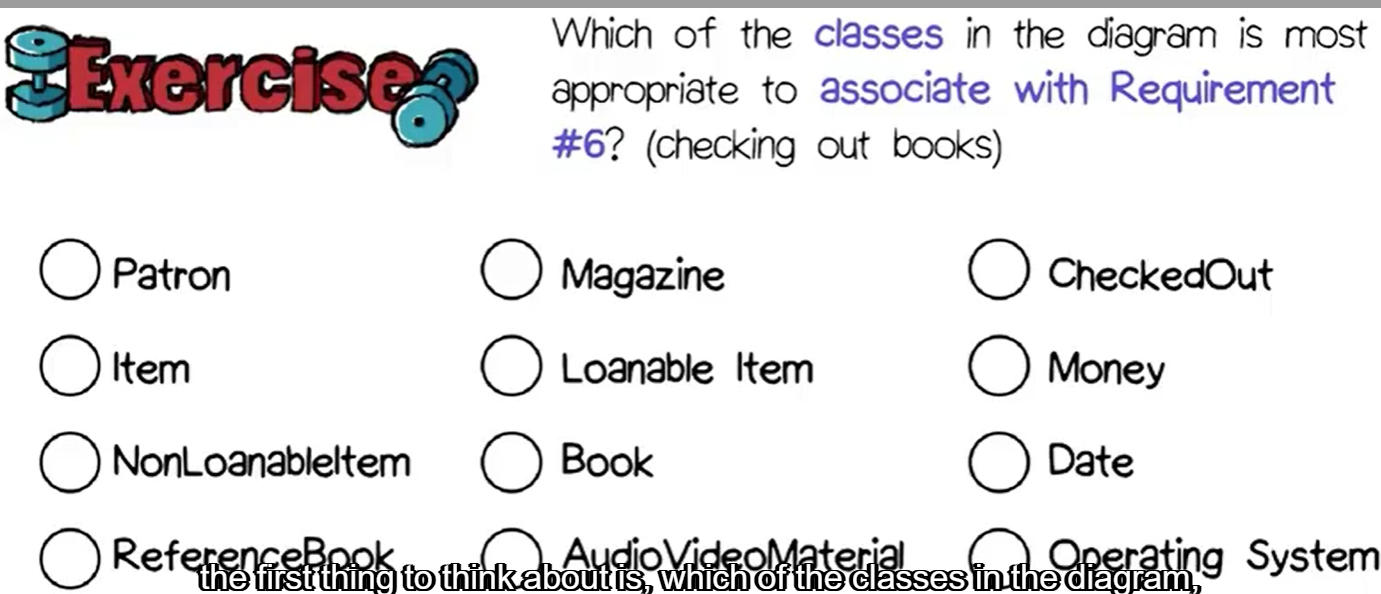
Book

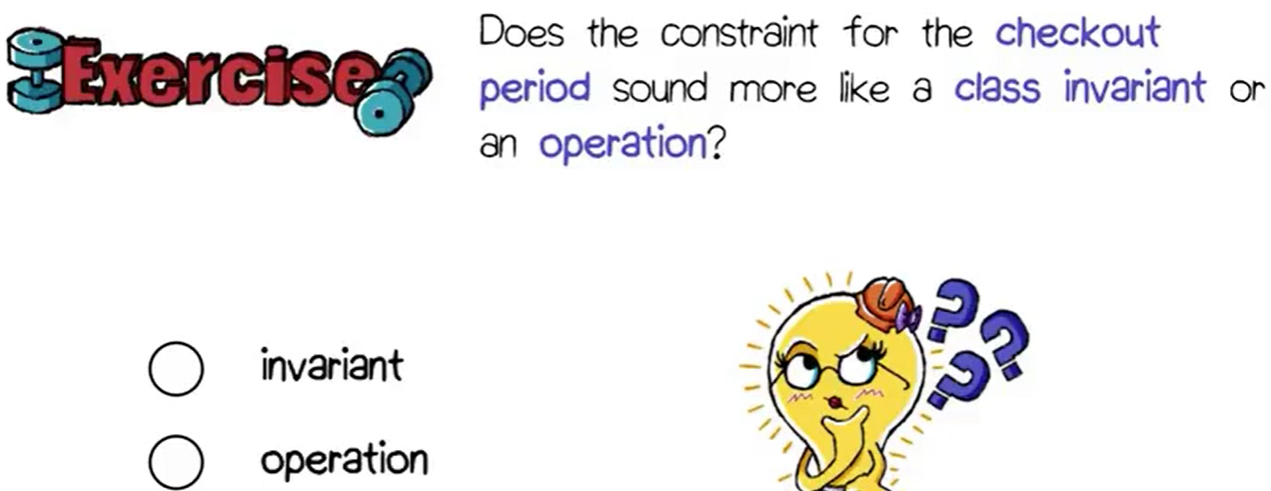
Invariant (over the book class)

1. invariant: if it's associated with a system or a part of the system that is a class
    1. what must be true about the system, or
    1. what must be true about the class
1. operation: if it's associated with an operation
    1. pre- & post-conditions for the operation 

1. Once we have determined the class to use and the type of constraint, we can actually express the constraint in OCL
```OCL
context Book inv:
    if bestSeller then
        checkouttPeriod = 2 -- weeks
    else
        checkoutPeriod = 3
    endif
```

1. Text expresses a single constraint
1. This constraint is an invariant
1. OCL keywords are highlighted in bold and a comment is expressed by appending two dashes and some text.
1. Each OCL constraint is interpreted in the context of a particular class
1. In the example the context is the Book class
1. All unqualified names appearing in the constraint are attributes of the Book class
1. Operations and associations may be similarly referenced
1. This particular constraint is a conditional (bestSeller)

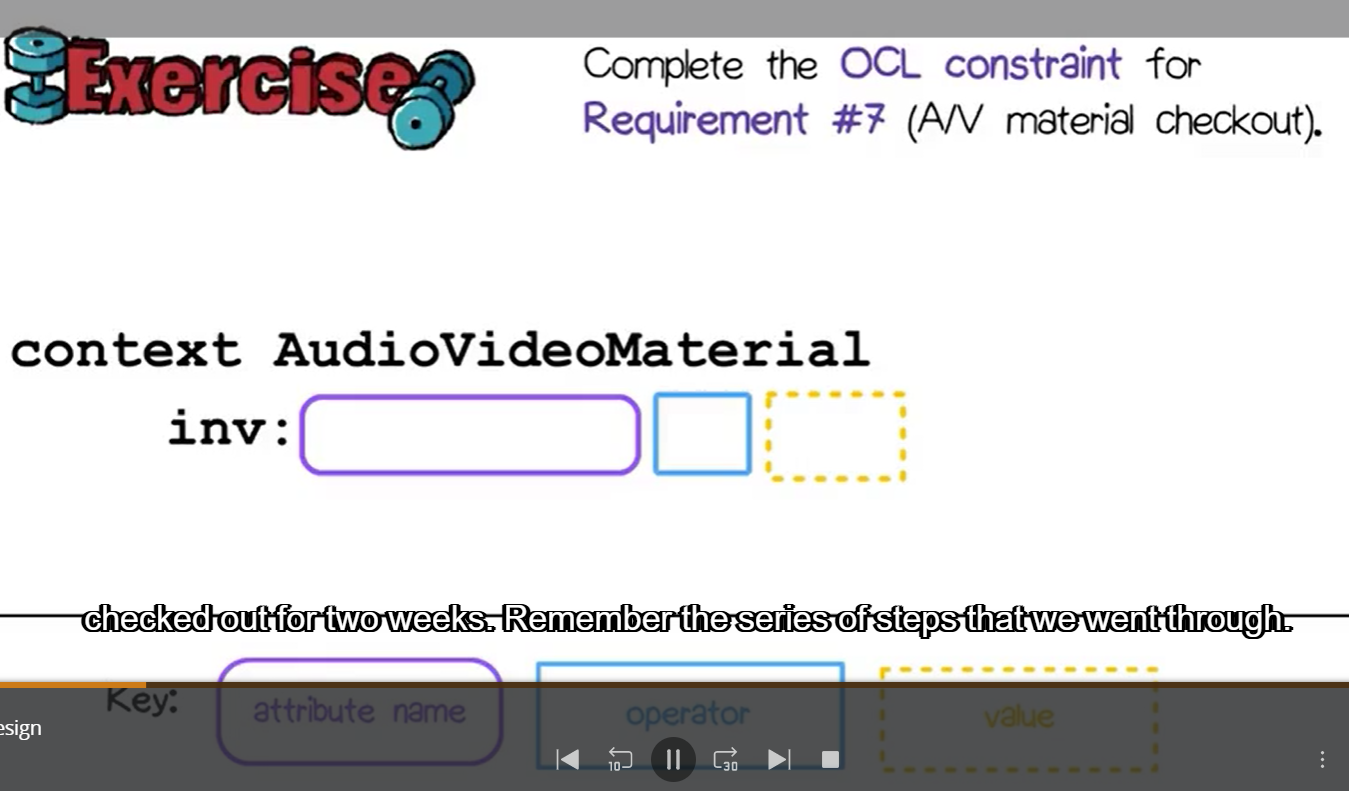
```
Context AudioVideoMaterial inv:checkoutperiod = 2
```

#### Operations
1. invariants are one constraint useful for describing properties of attributes that must always hold
1. OCL provides a way to specify Operations using pre- and post-condition constraints

### Requirement 3
1. Associated this text with an operation in class Patron called itemsCurrentlyCheckedout
1. Specify that the value computed by this operation in fact corresponds to just those items that are checked out for that Patron
1. checkedOut.LoanableItem is an example of a compound name
1. OCL treats the names of these associations syntactically just like it would treat an attribute

```
context Patron::itermsCurrentlyCheckedOut(): set(LoanableItem)
    post: result = checkedOut.LoanableItem
```

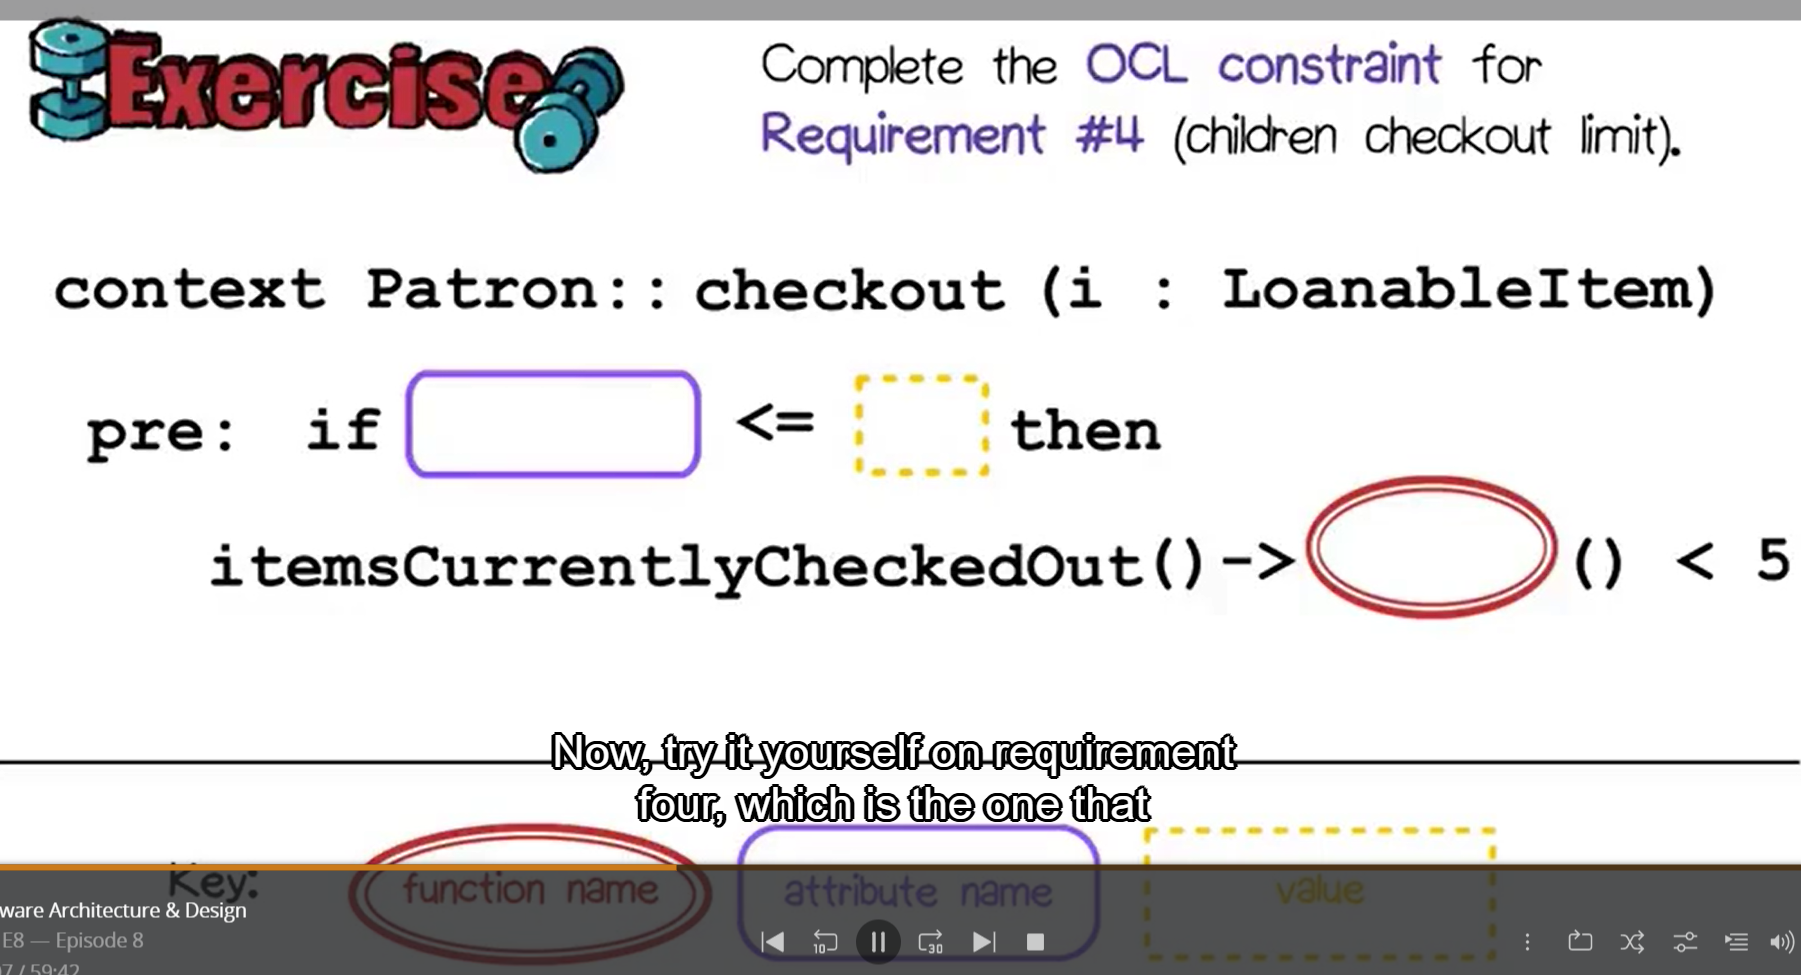
```
context Patron::checkOut(i:LoanableItem)
    pre: if age<=12 then itemCurrentlyCheckedOut().size()<5
```


### Requirement 4
```
context Patron::checkOut(i:LoanableItem)
    pre: age<=12 implies itemCurrentlyCheckedOut()->size()<5
```
1. Note that because this constraint is not a complete specification of checkOut, it contains no postcondition
1. implies is equivalent to -> in FOL
1. -> if for the built in operations for collections


#### Size Effects
1. Specify an even more complex situation - one where an Operation actually results in a change of state
1. Choose to model the actual process of checking out a LoanableItem as indicated in Requirement 5
1. Pure functions: operations that don't make any changes 
1. Impure: operations with side effects: change the value, IO operations, flashing something on the screen



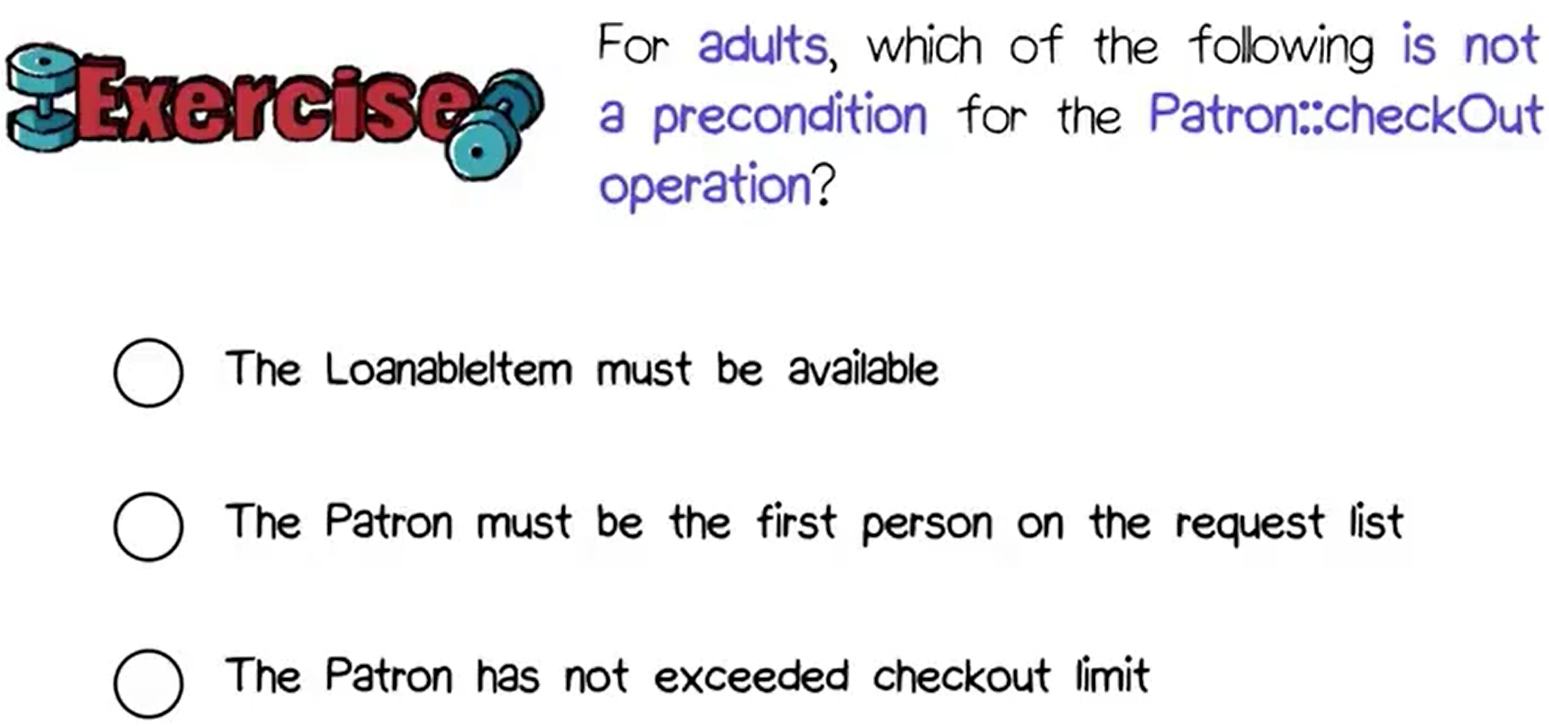
1. item must be available for check out
1. Patron cannot have any outstanding fees

### Requirement 5
```
context Patron::checkOut(i: LoanableItem)
pre:
    i.isAvailable() and
    i.notRequestedBySomeoneElse(self) and
    (age<=12 implies itemsCurrentlyCheckedOut()->size <5)
post:
    exists(c: CheckedOut | 
        c.loanableItem = i and 
        c.dueDate = operatingSystem.getDate() + c.loanableItem.checkoutPeriod and
        checkedOut = checkedOut@pre->including(c))

```
1. Precondition has three conjuncts
    1. For the first and second condition, we have invented new Operations, to be defined in class LoanableItem
    1. This is similar to what we do when writing a program and want to break up an algorithm into pieces
    1. After precondition
        1. itemsCurrentlyCheckedOut() should now contain the LoanableItem
        1. CheckedOut instance should be created with dueDate
1. The post condition has three clauses
    1. The first clause (c.loanableItem = i) says that after execution of the CheckOut operation is complete there must exist an instance (c) whose coresponding LoanableItem is the argument of CheckOut(i)
    1. make a statement of the quality between the state that exists before the checkOut operation and the state that exists afterwards
        1. checkout@pre: the version before we call the operation
        1. ->: c is associated with the set
        1. checkedOut = checkedOut@pre->including(c)): a new set which is the old set plus this new item
1. LET expression: an abbreviation allows us to state in one place and use it in several places
```
context Patron::checkOut(i: LoanableItem)
post:
    let t: Title = i.title in 
        if t.requests.patron->includes(self)
        then
            requests = requests@pre-reject(title = t and patron = self)
        else
            true
        endif
```

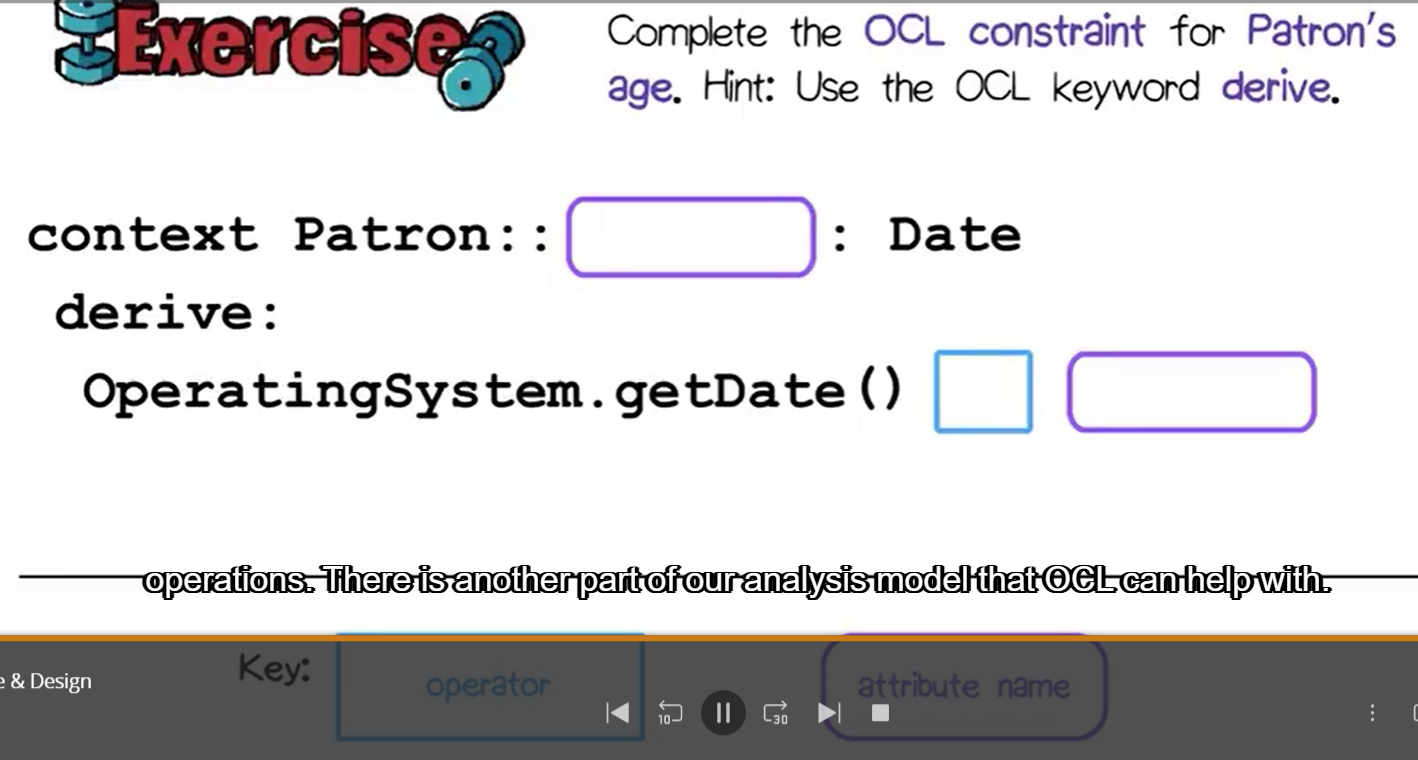
```
context Patron::age
    derived:
        currentDate - birthDate
```

### Missing Pieces
1. Illustrated some uses of OCL to provide precise specification for a simple library information system
1. There are many more things we would need to do to complete this exercise

### Observations
1. Maybe more than one answer
1. Be open during the process of analysis to the possibility of new requirements arising
1. May mean further consultation with the customer is required
1. A simple set of requirements can have so many issues - this should illustrate the value of constructing an OCL specification